In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('cpu_pass_cine_IM.csv')
data['cache'] = data['cache'].str.replace(' MB', '')
data['lithography'] = data['lithography'].str.replace(' nm', '')
data

,name,price,core_count,core_clock,boost_clock,tdp,graphics,smt,codename,socket,...,supported_mem,supported_chipset,release_date,pmprice,cpuMark,threadMark,powerPerf,category,CPU ScoreSingle 15,CPU ScoreMulti 15
0,Intel Core i7-12700K,241.99,12,3.6,5.0,125,Intel UHD Graphics 770,True,Alder Lake-S,Socket 1700,...,"DDR4, DDR5","Z690, H670, B660, H610","Nov 4th, 2021",409.00,34125,4047,179.61,Desktop,286,3327
1,AMD Ryzen 5 3600,104.99,6,3.6,4.2,65,NaN,True,Matisse,Socket AM4,...,DDR4,"AMD 300 Series, AMD 400 Series, AMD 500 Series","Jul 7th, 2019",153.49,17822,2576,274.18,Desktop,197,1578
2,Intel Core i5-12600K,189.99,10,3.7,4.9,125,Intel UHD Graphics 770,True,Alder Lake-S,Socket 1700,...,"DDR4, DDR5","Z690. H670, B660, H610","Nov 4th, 2021",277.98,27429,3965,182.86,Desktop,274,2596
3,Intel Core i9-12900K,344.99,16,3.2,5.2,125,Intel UHD Graphics 770,True,Alder Lake-S,Socket 1700,...,"DDR4, DDR5","Z690, H670, B660, H610","Nov 4th, 2021",599.95,41077,4209,170.44,Desktop,294,4111
4,Intel Core i5-10400F,114.64,6,2.9,4.3,65,NaN,True,Comet Lake,Socket 1200,...,DDR4,NaN,"Apr 30th, 2020",124.99,12439,2572,191.37,Desktop,190,1341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Intel Core i9-9900X,NaN,10,3.5,4.4,165,NaN,True,Skylake-X,Socket 2066,...,DDR4,NaN,"Oct 19th, 2018",654.99,21868,2604,132.54,Desktop,197,2114
142,Intel Core i5-7600T,147.91,4,2.8,3.7,35,Intel HD Graphics 630,False,Kaby Lake,Socket 1151,...,DDR4,NaN,"Jan 3rd, 2017",298.00,6073,2231,173.50,Desktop,157,593
143,Intel Core i3-4330,96.95,2,3.5,3.5,54,Intel HD Graphics 4600,True,Haswell,Socket 1150,...,DDR3,NaN,"Sep 1st, 2013",123.37,3539,1982,65.55,Desktop,137,351
144,Intel Core i3-6100T,289.95,2,3.2,3.2,35,Intel HD Graphics 530,True,Skylake,Socket 1151,...,"DDR3, DDR4",NaN,"Sep 1st, 2015",999.00,3617,1891,103.35,Desktop,131,339


In [3]:
#CSV file has columns 'X' and 'y' for features and target
X = data[['core_count', 'boost_clock', 'tdp', 'smt', 'cpuMark']]
y = data['CPU ScoreMulti 15']

#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#Create and train model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Squared Error: 14915.0
R² Score: 0.9867130550355862


In [5]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42, alpha=0.2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 6565.403900976938
R² Score: 0.9941512463760356


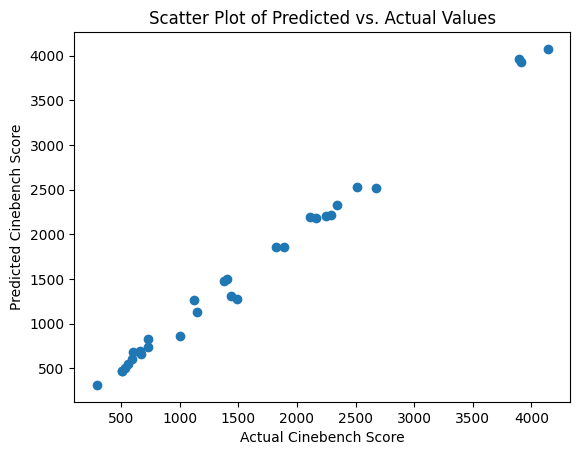

In [6]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Cinebench Score")
plt.ylabel("Predicted Cinebench Score")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()

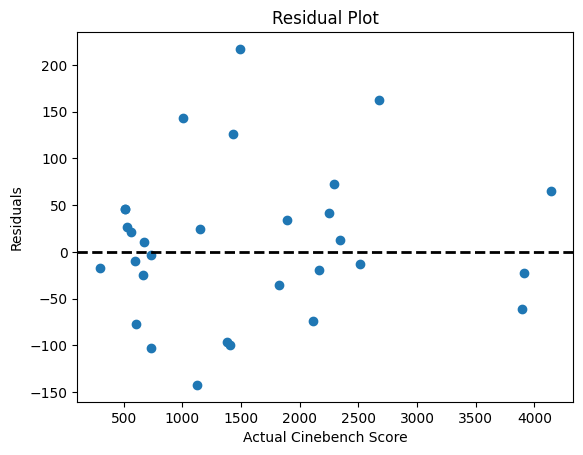

In [7]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel("Actual Cinebench Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

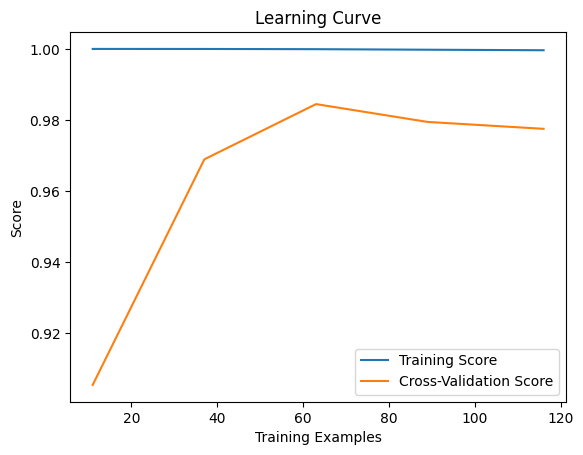

In [8]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [35]:
import pickle

def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

save_model(model, 'PDcinebench.pkl')